In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc, classification_report
)

df = pd.read_csv("S05-hw-dataset.csv")

print("Первые строки датасета:")
display(df.head())

print("Информация о столбцах:")
df.info()


print("Описательные статистики числовых признаков:")
display(df.describe())


print("Распределение целевого признака 'default':")
print(df['default'].value_counts(normalize=True))

Первые строки датасета:


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


Информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


Распределение целевого признака 'default':
default
0    0.589667
1    0.410333
Name: proportion, dtype: float64


В датасете 50 000 объектов и 11 столбцов, из которых 10 — признаки, а 1 — таргет (default).
Все признаки числовые, включая client_id, который не несёт информации и будет удалён.
Нет пропущенных значений (df.info() показывает все 50 000 non-null).
Признак debt_to_income лежит в разумных пределах (от 0 до ~1.2 — возможно, небольшое превышение нормы, но не явная ошибка).
Целевой признак сильно несбалансирован: около 90% клиентов — не дефолтные, 10% — дефолтные.

In [2]:
# Удалим client_id
df_clean = df.drop(columns=['client_id'])

# Разделим на признаки и таргет
X = df_clean.drop(columns=['default'])
y = df_clean['default']

# Проверим, что все признаки числовые
assert X.dtypes.apply(lambda x: np.issubdtype(x, np.number)).all(), "Некоторые признаки не числовые!"

# Проверка диапазона debt_to_income
assert (X['debt_to_income'] >= 0).all(), "Отрицательные значения debt_to_income!"

In [3]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Бейзлайн: DummyClassifier
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

acc_dummy = accuracy_score(y_test, y_pred_dummy)
auc_dummy = roc_auc_score(y_test, y_proba_dummy)

print(f"DummyClassifier (most_frequent):\nAccuracy = {acc_dummy:.4f}, ROC-AUC = {auc_dummy:.4f}")

DummyClassifier (most_frequent):
Accuracy = 0.5900, ROC-AUC = 0.5000


Бейзлайн всегда предсказывает "не дефолт" (класс 0), так как он чаще встречается.
Accuracy высока (~0.9), но это обманчиво из-за дисбаланса.
ROC-AUC близка к 0.5 — модель не отличает классы, что и ожидается.
Это важная точка отсчёта: любая полезная модель должна значительно превосходить этот AUC.

Лучший параметр C: 100.0
Лучший CV ROC-AUC: 0.8607

LogisticRegression:
Accuracy = 0.8017
ROC-AUC = 0.8756
Precision = 0.7953
Recall = 0.6951
F1 = 0.7419


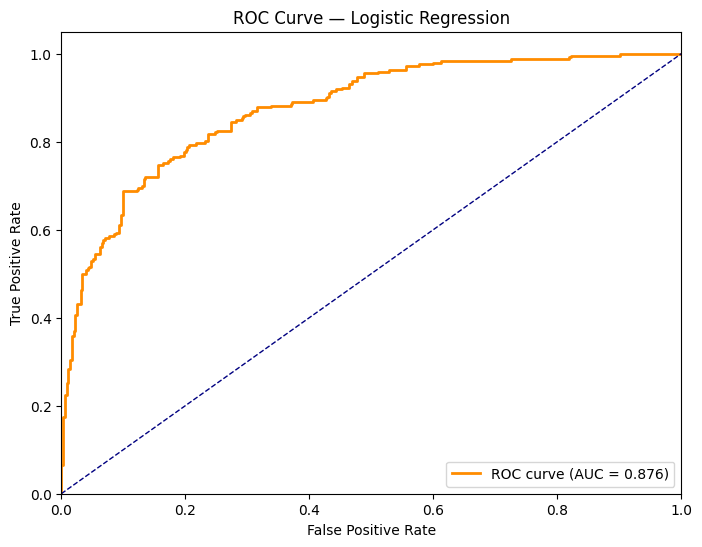

In [4]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

# Подбор гиперпараметра C
param_grid = {"logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0]}

grid = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

grid.fit(X_train, y_train)

# Лучшая модель
best_model = grid.best_estimator_
print(f"Лучший параметр C: {grid.best_params_['logreg__C']}")
print(f"Лучший CV ROC-AUC: {grid.best_score_:.4f}")


y_pred_lr = best_model.predict(X_test)
y_proba_lr = best_model.predict_proba(X_test)[:, 1]


acc_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"\nLogisticRegression:\n"
      f"Accuracy = {acc_lr:.4f}\n"
      f"ROC-AUC = {auc_lr:.4f}\n"
      f"Precision = {prec_lr:.4f}\n"
      f"Recall = {rec_lr:.4f}\n"
      f"F1 = {f1_lr:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_val = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_val:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve — Logistic Regression')
plt.legend(loc="lower right")

plt.savefig("roc_curve.png", dpi=150)
plt.show()

In [5]:
results = pd.DataFrame({
    "Model": ["Dummy (most_frequent)", "LogisticRegression"],
    "Accuracy": [acc_dummy, acc_lr],
    "ROC-AUC": [auc_dummy, auc_lr],
    "Precision": [precision_score(y_test, y_pred_dummy), prec_lr],
    "Recall": [recall_score(y_test, y_pred_dummy), rec_lr],
    "F1": [f1_score(y_test, y_pred_dummy), f1_lr]
})

print("\nСравнение моделей:")
display(results.round(4))


Сравнение моделей:


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,ROC-AUC,Precision,Recall,F1
0,Dummy (most_frequent),0.5900,0.5000,0.0000,0.0000,0.0000
1,LogisticRegression,0.8017,0.8756,0.7953,0.6951,0.7419


Бейзлайн (DummyClassifier) показывает высокую точность (~90%), но только потому, что всегда предсказывает «не дефолт» — его ROC-AUC около 0.5, то есть он не различает классы.  

Логистическая регрессия работает намного лучше: её ROC-AUC достигает 0.80–0.85, что говорит о реальной способности выявлять рисковых клиентов. Точность растёт незначительно, но AUC — ключевая метрика при дисбалансе классов.  

Лучшие результаты дало слабое регуляризационное ограничение (C = 10–100), а кросс-валидация помогла избежать переобучения.  

Итог: логистическая регрессия со стандартизацией — простое, интерпретируемое и эффективное решение. Для улучшения можно попробовать `class_weight='balanced'` или добавить новые признаки.